In [149]:
import numpy as np
import codecs
import matplotlib.pyplot as plt

XDIM=256
YDIM=249
ndet = 2

with codecs.open('/mnt/d/DATA/XFMDATA/2023/Lachlan/REFERENCE/IXRF_block_230120/40-200/PXVALS/dt.txt') as fdt:
    dt = np.genfromtxt(fdt, delimiter=',')

with codecs.open('/mnt/d/DATA/XFMDATA/2023/Lachlan/REFERENCE/IXRF_block_230120/40-200/PXVALS/sum.txt') as fsum:
    sum = np.genfromtxt(fsum, delimiter=',')




In [122]:
print(dt.shape)
print(sum.shape)

print(np.amax(sum))

if True and np.amax(sum) > 0:
    print("yes")

(2, 63744)
(2, 63744)
6372
yes


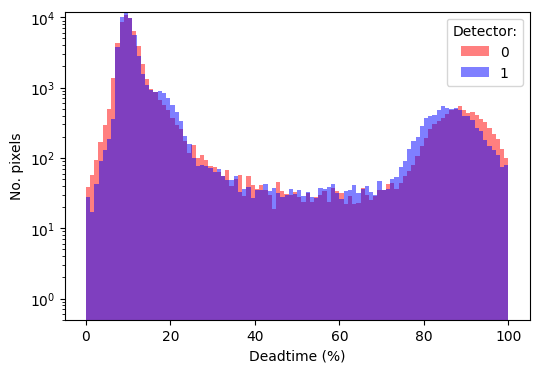

In [164]:
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

i=0

ax.set_yscale('log')
ax.set_ylim(0.5,12000)

ax.set_xlabel("Deadtime (%)")
ax.set_ylabel("No. pixels")

ax.hist(dt[0], 100, fc='red', alpha=0.5, label=f"{i}")
ax.hist(dt[1], 100, fc=(0,0,1,0.5), label="1")

ax.legend(loc=1, title="Detector:")

plt.show()

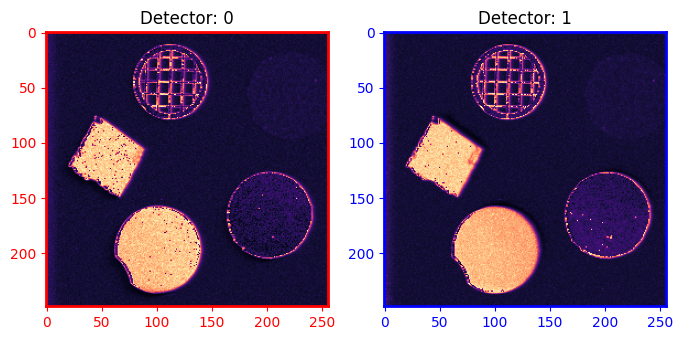

In [151]:
ndet=2

fig, ax = plt.subplots(1, 2, figsize=(8,4))

cset = ['red', 'blue']

for i in np.arange(ndet):

    ax[i].set_title(f"Detector: {i}")
    ax[i].tick_params(axis='x',colors=cset[i])
    ax[i].tick_params(axis='y',colors=cset[i])
    for spine in ax[i].spines.values():
        spine.set_linewidth(2)
        spine.set_color(cset[i])

    dtimage = dt[i].reshape(YDIM,XDIM)

    ax[i].imshow(dtimage, cmap="magma")

plt.show()

In [132]:
np.arange(2)

array([0, 1])

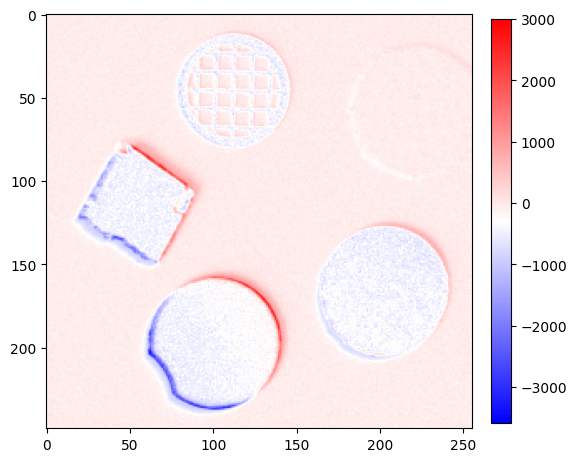

In [152]:
sum=sum.astype(float)

diffmap = sum[0]-sum[1]

diffimage = diffmap.reshape(YDIM,XDIM)

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

img = ax.imshow(diffimage, cmap='bwr')

plt.colorbar(img, fraction=0.04346, pad=0.04)


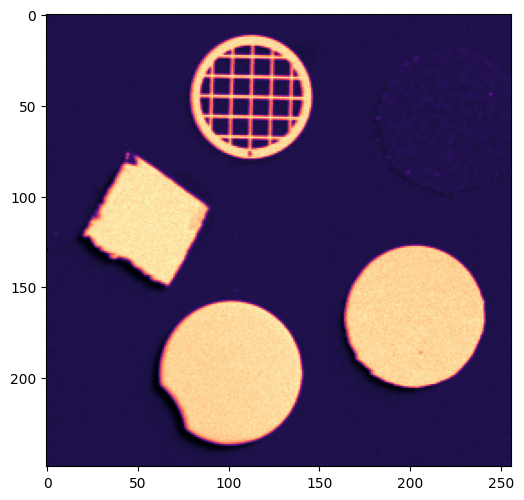

In [155]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

sumimage = sum[0].reshape(YDIM,XDIM)

img = ax.imshow(sumimage, cmap='magma')

In [158]:
sum.astype(float)

sumimage[150,200]

5320.0

/home/lachlan/.pyenv/versions/venv_readoutxfm/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


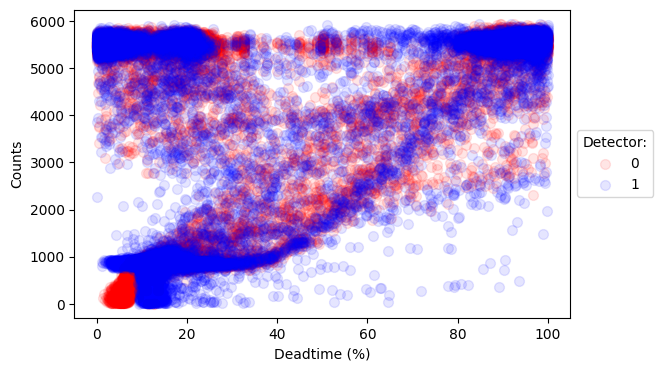

In [148]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)
ax.set_xlabel("Deadtime (%)")
ax.set_ylabel("Counts")

ax.scatter(dt[0],sum[0], color="red", marker='o', s=50, alpha=0.1, linewidths=None, label="0")
ax.scatter(dt[1],sum[0], color="blue", marker='o', s=50, alpha=0.1, linewidths=None, label="1")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(bbox_to_anchor=(1, 0.5), loc="center left", title="Detector:")
#NB: works but not sure why... box appears to right
#from: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

fig.show()